In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /content/drive
Mounted at /gdrive
/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Imputing missing Values

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(data[['Age']])

data['Age'] = impute.transform(data[['Age']])


In [ ]:
print("Shape of dataframe before dropping:", data.shape)
data = data.dropna(axis = 0, subset = ['Embarked'])
print("Shape after dropping:", data.shape)

Shape of dataframe before dropping: (891, 12)
Shape after dropping: (889, 12)


In [ ]:
data = data.drop(['Cabin'], axis = 1)
data.shape

(889, 11)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###Encoding categorical variables

In [ ]:

Embarked = pd.get_dummies(data[['Embarked']])

data = pd.concat([data, Embarked], axis=1)

data = data.drop(['Embarked'], axis = 1)



In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data['Sex'] = data['Sex'].map({'female':0,'male':1}) 


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


###Feature Engineering

In [ ]:
data['Family']      = data['Parch']+data['SibSp']+1
data                = data.drop(['Parch','SibSp'],axis=1)



In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0,1,1


###Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare','Family']]= scaler.fit_transform(data[['Age', 'Fare','Family']])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.590495,A/5 21171,-0.500240,0,0,1,0.057853
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.643971,PC 17599,0.788947,1,0,0,0.057853
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.281878,STON/O2. 3101282,-0.486650,0,0,1,-0.561804
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.412509,113803,0.422861,0,0,1,0.057853
4,5,0,3,"Allen, Mr. William Henry",1,0.412509,373450,-0.484133,0,0,1,-0.561804


### Feature Selection

In [ ]:
data = data.drop(['Ticket'], axis = 1)
data = data.drop(['Name'], axis = 1)
data = data.drop(['PassengerId'], axis = 1)

data.head()


,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
0,0,3,1,-0.590495,-0.500240,0,0,1,0.057853
1,1,1,0,0.643971,0.788947,1,0,0,0.057853
2,1,3,0,-0.281878,-0.486650,0,0,1,-0.561804
3,1,1,0,0.412509,0.422861,0,0,1,0.057853
4,0,3,1,0.412509,-0.484133,0,0,1,-0.561804


In [ ]:
data_corr = data.corr()
data_corr

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
Survived,1.000000,-0.335549,-0.541585,-0.074673,0.255290,0.169966,0.004536,-0.151777,0.018277
Pclass,-0.335549,1.000000,0.127741,-0.327954,-0.548193,-0.245733,0.220558,0.076466,0.064221
Sex,-0.541585,0.127741,1.000000,0.089434,-0.179958,-0.084520,-0.075217,0.121405,-0.203191
Age,-0.074673,-0.327954,0.089434,1.000000,0.088604,0.033853,-0.012823,-0.021589,-0.247546
Fare,0.255290,-0.548193,-0.179958,0.088604,1.000000,0.270731,-0.116684,-0.163758,0.218658
Embarked_C,0.169966,-0.245733,-0.084520,0.033853,0.270731,1.000000,-0.148646,-0.782613,-0.046852
Embarked_Q,0.004536,0.220558,-0.075217,-0.012823,-0.116684,-0.148646,1.000000,-0.499261,-0.059007
Embarked_S,-0.151777,0.076466,0.121405,-0.021589,-0.163758,-0.782613,-0.499261,1.000000,0.078197
Family,0.018277,0.064221,-0.203191,-0.247546,0.218658,-0.046852,-0.059007,0.078197,1.000000


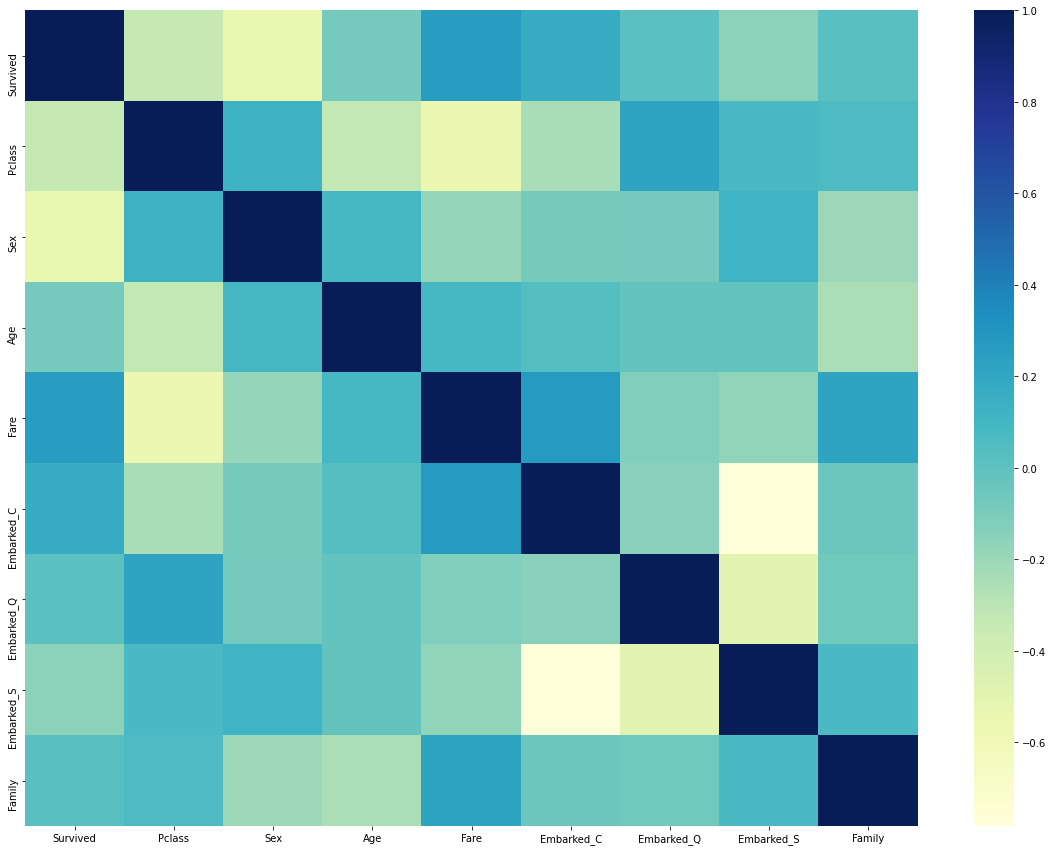

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(nrows=1, figsize=(20, 15))
sns.heatmap(data_corr, cmap = 'YlGnBu')

In [ ]:
from sklearn.model_selection import train_test_split

X =data.drop(['Survived','Pclass'], axis=1)
y =data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1,test_size=0.3)

### Machine Learning Model 


####Decision tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dtree_predict = dtree.predict(X_test)
y_pred = []
y_pred.append(dtree.predict(X_test))

####RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(X_train,y_train)
y_pred.append(clf.predict(X_test))

####LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred.append(logmodel.predict(X_test))

####KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred.append(knn.predict(X_test))

###Evaluation


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

name = ['Decision tree','Random forest', 'Logistic Regression','KNN']
for i in range(0,4):
  print(name[i])
  print('')
  print(confusion_matrix(y_test,y_pred[i]))
  print(classification_report(y_test,y_pred[i]))

  y_true = y_test

  mean_absolute_error(y_true, y_pred[i])

  print("")


Decision tree

[[128  38]
 [ 26  75]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       166
           1       0.66      0.74      0.70       101

    accuracy                           0.76       267
   macro avg       0.75      0.76      0.75       267
weighted avg       0.77      0.76      0.76       267


Random forest

[[146  20]
 [ 23  78]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       166
           1       0.80      0.77      0.78       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267


Logistic Regression

[[141  25]
 [ 24  77]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       166
           1       0.75      0.76      0.76       101

    accuracy                           0.82       267
   mac